**Questão 1:** Um passo crucial do método descrito acima está na decisão se um ponto dado é interno ou externo ao
polígono dado. Discuta como implementar este teste com base nos dados de entrada.

**Resposta:** Para este problema eu utilizei um método baseado em produtos vetoriais chamado de teste de winding number simplificado. Que essencialmente usa o produto vetorial para checar se as arestas estão girando sempre na mesma orientação entre o ponto de referência e a base da aresta, da seguinte forma: 

$$\text{Se }\forall j, \forall i \text{ tal que } (j-i) = 1, \text{ temos } ((V_i - V_j) \times (V_i - P))_z \geq 0\Rightarrow \text{Ponto dentro do polígono}.$$ 

**Questão 2**: Implemente o método descrito acima e teste-o com triângulos e quadriláteros cuja área teórica pode ser
facilmente calculada. Use estes exemplos para comparar a área real com a área estimada pelo método para M = 100,
M = 1000 e M = 10000. Gere figuras semelhantes à Figura 2 para dois exemplos.

**Resposta:** Segue três células, com o código implementando o exemplo para um triângulo e um retângulo. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def read_polygon_from_csv(file_path):
    """Lê os vértices de um CSV (colunas: x, y)."""
    df = pd.read_csv(file_path)
    print(df)
    polygon = df[['x', 'y']].dropna().values.tolist() # Alguma sanitização do input
    return polygon

def check_point_polygon_convex(polygon, P):
    n = len(polygon)
    signal = None
    for i in range(n):
        V_i = polygon[i]
        V_j = polygon[(i + 1) % n]
        
        # Produto vetorial (V_i -> V_j) x (V_i -> P)
        cross = (V_j[0] - V_i[0]) * (P[1] - V_i[1]) - (V_j[1] - V_i[1]) * (P[0] - V_i[0])
        
        if cross == 0:  # Ponto na aresta
            return True
        if signal is None:
            signal = cross > 0
        else:
            if (cross > 0) != signal:
                return False  # Fora
    return True  # Dentro

def monte_carlo_area(polygon, num_points=10000):
    """ Essa função estima a área de um poligono (necessariamente convexo)
        utilizando o algoritmo de Monte Carlo."""
    # Gera pontos uniformemente distribuídos em [0,1] x [0,1] 
    test_points = np.random.rand(num_points, 2)
    inside_points = [point for point in test_points if check_point_polygon_convex(polygon, point) is True]
    estimated_area = len(inside_points) / num_points  # Area do quadrado unitário = 1
    return estimated_area, test_points, inside_points

def plot_polygon_and_points(polygon, test_points, inside_points):
    """Plota o poligono, pontos interiores em vermelho, pontos exteriores em preto."""
    
    # plota todos os pontos de teste (preto = exterior, vermelho = interior)
    out_x, out_y = zip(*test_points) 

    # inicial variaveis para o plot dos pontos
    in_x = in_y  = []

    if inside_points:
        in_x, in_y = zip(*inside_points)

    plt.scatter(out_x, out_y, color='black', s=3, alpha=0.5, label='Exterior')
    plt.scatter(in_x, in_y, color='red', s=3, alpha=0.5, label='Interior')
    # plota poligo
    poly_x, poly_y = zip(*polygon) # Uso essa função só para garantir a formatação
    plt.plot(poly_x + (poly_x[0],), poly_y + (poly_y[0],), 'b-', linewidth=2, label='Polígono')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Calculo da área pelo método de Monte Carlo')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()


     x    y
0  0.2  0.2
1  0.2  0.8
2  0.6  0.2
3  0.2  0.2


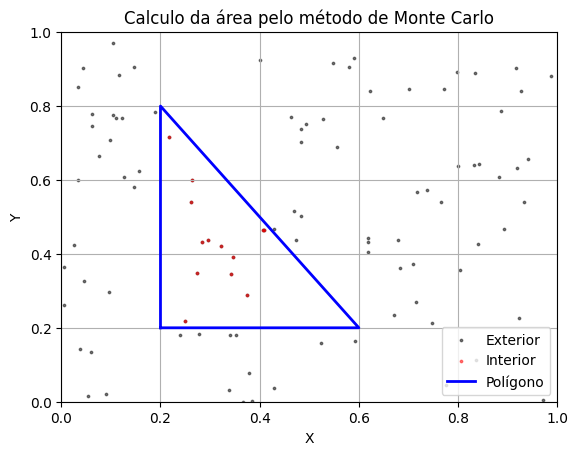

Área estimada do polígono: 0.1300
Área real: 0.1200


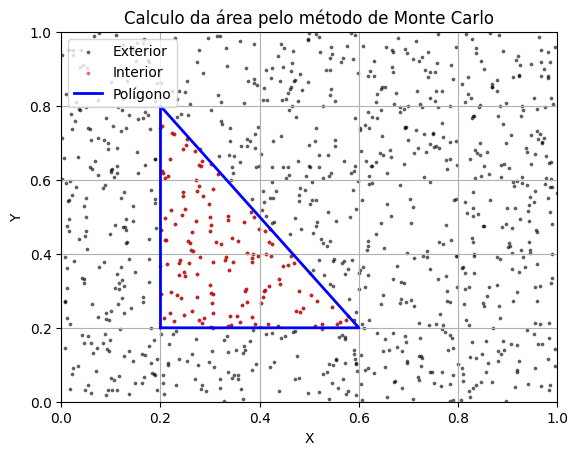

Área estimada do polígono: 0.1340
Área real: 0.1200


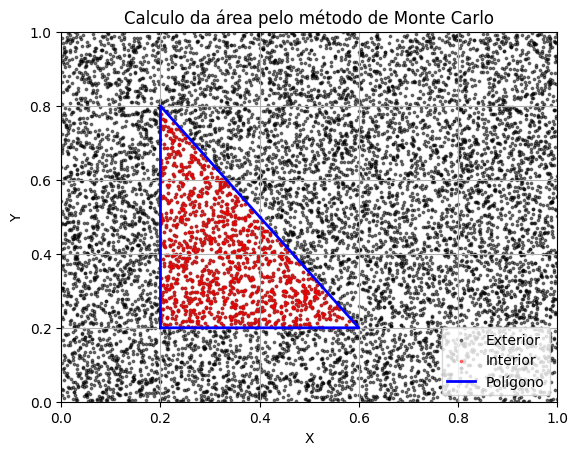

Área estimada do polígono: 0.1161
Área real: 0.1200


In [3]:
""" EXEMPLO COM O TRIANGULO """ 
real_triangle_area = 0.4*0.6/2 # Mude isso quando mudar o csv
if __name__ == "__main__":
    file_name = "triangulo-vertices.csv"
    point_num = [100, 1000, 10000]
    polygon = read_polygon_from_csv(file_name)

    for num in point_num:
        estimated_area, test_points, inside_points = monte_carlo_area(polygon, num_points=num)

        plot_polygon_and_points(polygon, test_points, inside_points)
        
        print(f"Área estimada do polígono: {estimated_area:.4f}")
        print(f"Área real: {real_triangle_area:.4f}")

     x    y
0  0.2  0.2
1  0.2  0.8
2  0.6  0.8
3  0.6  0.2
4  0.2  0.2


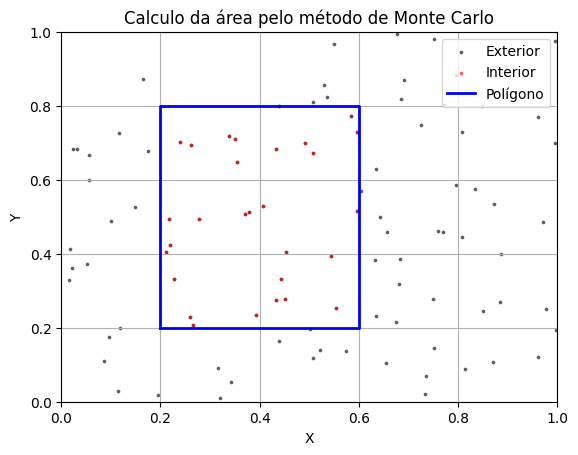

Área estimada do polígono: 0.2900
Área real: 0.2400


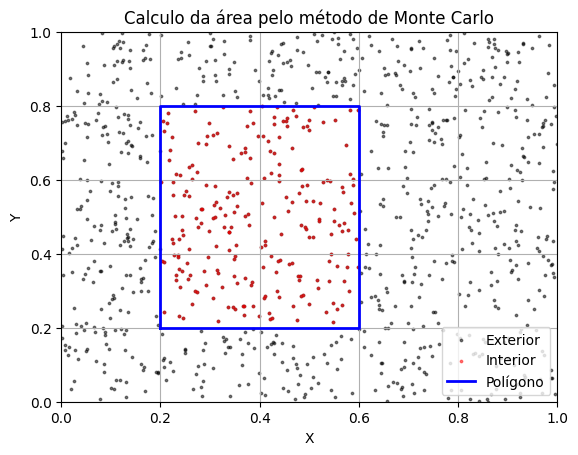

Área estimada do polígono: 0.2300
Área real: 0.2400


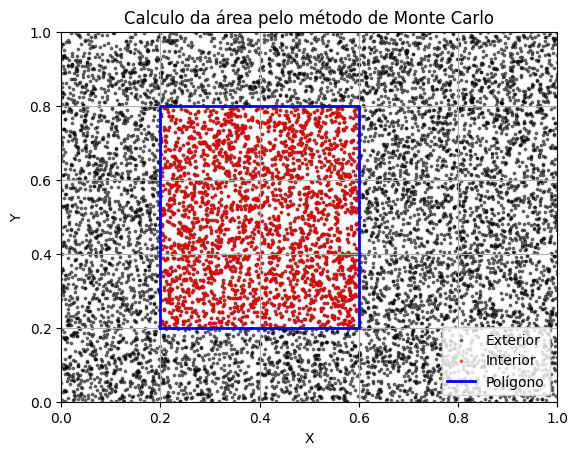

Área estimada do polígono: 0.2445
Área real: 0.2400


In [4]:
""" EXEMPLO COM O RETÂNGULO """ 
real_retangle_area = 0.4*0.6 # Mude isso quando mudar o csv
if __name__ == "__main__":
    file_name = "retangulo-vertices.csv"
    point_num = [100, 1000, 10000]
    polygon = read_polygon_from_csv(file_name)

    for num in point_num:
        estimated_area, test_points, inside_points = monte_carlo_area(polygon, num_points=num)

        plot_polygon_and_points(polygon, test_points, inside_points)
        
        print(f"Área estimada do polígono: {estimated_area:.4f}")
        print(f"Área real: {real_retangle_area:.4f}")

**Questão 3:** Use o método implementado para calcular a área de um polı́gono especial, fornecido pela equipe de ensino.
Use M = 10000 e gere uma figura semelhante à Figura 2 para este caso.

**Resposta:** Segue o código para o polígono arbitrário. 

        x       y
0  0.0479  0.0165
1  0.1287  0.4357
2  0.2170  0.5713
3  0.3150  0.2918
4  0.2115  0.0478


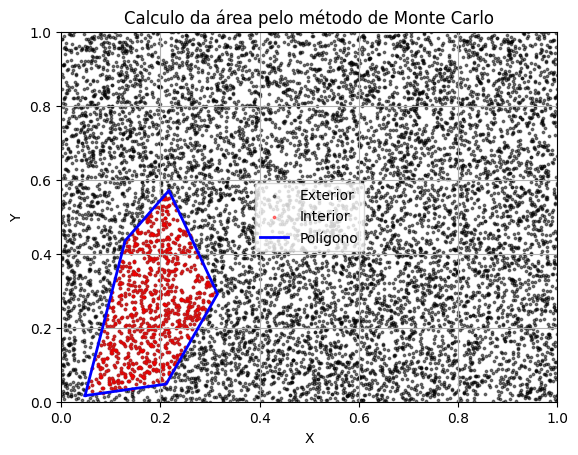

Área estimada do polígono: 0.0824


In [5]:
""" EXEMPLO COM O POLIGONO ARBITRARIO """ 

if __name__ == "__main__":
    file_name = "poligono-arbitrario.csv"
    point_num = [10000]
    polygon = read_polygon_from_csv(file_name)

    for num in point_num:
        estimated_area, test_points, inside_points = monte_carlo_area(polygon, num_points=num)
        plot_polygon_and_points(polygon, test_points, inside_points)
        print(f"Área estimada do polígono: {estimated_area:.4f}")


**Questão 4:** Discuta quais seriam as dificuldades que poderiam surgir se os pontos dados não estivessem ordenados,
isto é, se o ponto vk e o ponto vk+1 não definissem um lado do polı́gono.

**Resposta:** Se os pontos não estivessem ordenados, teríamos o problema de não conseguir definir uma orientação de "giro" consistente, que é a base do algoritmo em questão usado. Pegue o caso mais básico de um triângulo, sejam os vertices ordenados $V_1, V_2 \text{ e } V_3$, se por acaso o algoritmo receber os vértices na ordem $V_1, V_3 \text{ e depois } V_2$, teríamos uma aresta "indo" e outra "voltando" em relação ao ponto, que alteraria o sinal do produto vetorial. 

**Questão 5:** O seu método funcionaria se o polı́gono em questão não fosse convexo? Onde estaria o problema?

**Resposta:** Teríamos problemas, porque, em relação a trajetória de um polígono convexo, um ponto só pode aumentar seu ângulo acumulativo  (a ideia do winding number é que eventualmente esse número é um multiplo inteiro de pi e etc, mas isso não afeta a discussão aqui), um ponto no polígono não-convexo pode aumentar e diminuir esse valor, o que significaria que a orientação do "giro" da trajetória mudou e portanto o método falharia. 